# Merging/joining datasets

In [2]:
data_main.shape

(8618, 10)

## how many unique athletes are there in the dataset

In [3]:
## how many unique athletes are there in the dataset
a=data_main['Athlete'].unique().tolist()
len(a)

6956

## import the Athelete Country Map.csv 

In [4]:
country_map=pd.read_csv("E:/O'Reilly - Advance predictive analytics/Chapter 3/Medals/Athelete_Country_Map.csv")
country_map.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [5]:
country_map.shape

(6970, 2)

## import the Athelete Sports Map.csv 

In [6]:
sports_map=pd.read_csv("E:/O'Reilly - Advance predictive analytics/Chapter 3/Medals/Athelete_Sports_Map.csv")
sports_map.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [7]:
sports_map.shape

(6975, 2)

## merge the data_main and country_map data frames to get the country for all the athletes

In [8]:
merged=pd.merge(left=data_main,right=country_map,left_on='Athlete',right_on='Athlete')
merged.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Unnamed: 8,Unnamed: 9,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN,NaN,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN,NaN,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN,NaN,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,NaN,NaN,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,NaN,NaN,United States


In [9]:
merged.shape

(7668, 11)

## remove the duplicate entries from the country_map data frame and then perform the merge

In [11]:
## remove the duplicate entries from the country_map data frame 
country_map_dp=country_map.drop_duplicates(subset='Athlete')
country_map_dp.shape

(6956, 2)

## Let us now merge this with data_main

In [12]:
merged_dp=pd.merge(left=data_main,right=country_map_dp,left_on='Athlete',right_on='Athlete')
len(merged_dp)

7631

## merge sports_map with the merged_dp to get the country and sports along with other details

In [14]:
sports_map_dp=sports_map.drop_duplicates(subset='Athlete')
len(sports_map_dp)


6956

## to merge this with the merge_pd data frame to get the sports played by the athlete in the final merged table

In [15]:
merged_final=pd.merge(left=merged_dp,right=sports_map_dp,left_on='Athlete',right_on='Athlete')
merged_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Unnamed: 8,Unnamed: 9,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN,NaN,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN,NaN,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN,NaN,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,NaN,NaN,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,NaN,NaN,United States,Swimming


# Inner, Left, Right, Outer Join

In [17]:
country_map_dlt=country_map_dp[(country_map_dp['Athlete']<>'Michael Phelps') & (country_map_dp['Athlete']<>'Natalie Coughlin') & (country_map_dp['Athlete']<>'Chen Jing')
                    & (country_map_dp['Athlete']<>'Richard Thompson') & (country_map_dp['Athlete']<>'Matt Ryan')]
len(country_map_dlt)

6951

In [18]:
sports_map_dlt=sports_map_dp[(sports_map_dp['Athlete']<>'Michael Phelps') & (sports_map_dp['Athlete']<>'Natalie Coughlin') & (sports_map_dp['Athlete']<>'Chen Jing')
                    & (sports_map_dp['Athlete']<>'Richard Thompson') & (sports_map_dp['Athlete']<>'Matt Ryan')]
len(sports_map_dlt)

data_main_dlt=data_main[(data_main['Athlete']<>'Michael Phelps') & (data_main['Athlete']<>'Natalie Coughlin') & (data_main['Athlete']<>'Chen Jing')
                    & (data_main['Athlete']<>'Richard Thompson') & (data_main['Athlete']<>'Matt Ryan')]
len(data_main_dlt)

8605

## An example of the Inner Join

In [19]:
merged_inner=pd.merge(left=data_main,right=country_map_dlt,how='inner',left_on='Athlete',right_on='Athlete')
len(merged_inner)

7618

In [21]:
merged_inner.head(5)

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Unnamed: 8,Unnamed: 9,Country
0,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,NaN,NaN,Russia
1,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,NaN,NaN,Australia
2,Missy Franklin,17.0,2012,08/12/2012,4,0,1,5,NaN,NaN,United States
3,Ryan Lochte,27.0,2012,08/12/2012,2,2,1,5,NaN,NaN,United States
4,Ryan Lochte,24.0,2008,08/24/2008,2,0,2,4,NaN,NaN,United States


## An example of the Left Join 

In [22]:
merged_left=pd.merge(left=data_main,right=country_map_dlt,how='left',left_on='Athlete',right_on='Athlete')
len(merged_left)

8618

#### check the merged_left for an athlete whose information is not present in the country_map_dlt. It should contain NaN for the Country column

In [23]:
merged_left_slt=merged_left[merged_left['Athlete']=='Michael Phelps']
merged_left_slt

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Unnamed: 8,Unnamed: 9,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN,NaN,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN,NaN,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN,NaN,NaN


### An example of the Right Join

In [24]:
merged_right=pd.merge(left=data_main_dlt,right=country_map_dp,how='right',left_on='Athlete',right_on='Athlete')
len(merged_right)

8420

In [27]:
advert=pd.read_csv("E:/O'Reilly - Advance predictive analytics/Chapter 5/Advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## find out the correlation between the advertisement costs on TV and the resultant sales

In [28]:
import numpy as np
advert['corrn']=(advert['TV']-np.mean(advert['TV']))*(advert['Sales']-np.mean(advert['Sales']))
advert['corrd1']=(advert['TV']-np.mean(advert['TV']))**2
advert['corrd2']=(advert['Sales']-np.mean(advert['Sales']))**2
corrcoeffn=advert.sum()['corrn']
corrcoeffd1=advert.sum()['corrd1']
corrcoeffd2=advert.sum()['corrd2']
corrcoeffd=np.sqrt(corrcoeffd1*corrcoeffd2)
corrcoeff=corrcoeffn/corrcoeffd
corrcoeff

0.78222442486160604

## convert the preceding calculation to a function, so that we can calculate all the pairs of correlation coefficients

In [ ]:
def corrcoeff(df,var1,var2):
    df['corrn']=(df[var1]-np.mean(df[var1]))*(df[var2]-np.mean(df[var2]))
    df['corrd1']=(df[var1]-np.mean(df[var1]))**2
    df['corrd2']=(df[var2]-np.mean(df[var2]))**2
    corrcoeffn=df.sum()['corrn']
    corrcoeffd1=df.sum()['corrd1']
    corrcoeffd2=df.sum()['corrd2']
    corrcoeffd=np.sqrt(corrcoeffd1*corrcoeffd2)
    corrcoeff=corrcoeffn/corrcoeffd
    return corrcoeff

## correlation by plotting TV and Sales variables 

Text(0.5,1,u'TV vs Sales')

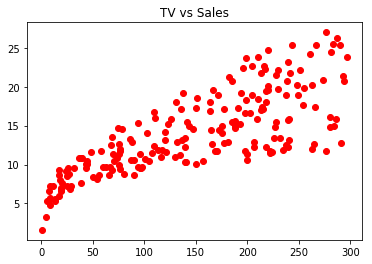

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(advert['TV'],advert['Sales'],'ro')
plt.title('TV vs Sales')

## plotting Radio vs Sales data

Text(0.5,1,u'Radio vs Sales')

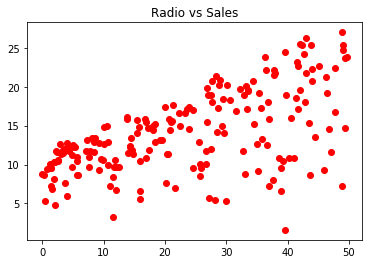

In [36]:
plt.plot(advert['Radio'],advert['Sales'],'ro')
plt.title('Radio vs Sales')

## plotting Newspaper vs Sales data

Text(0.5,1,u'Newspaper vs Sales')

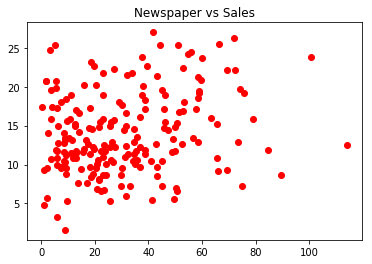

In [37]:
plt.plot(advert['Newspaper'],advert['Sales'],'ro')
plt.title('Newspaper vs Sales')